Name: Farhan Shoukat<br>
Roll No: Fa20/BSAI/048<br>
Lab: 9<br>
Group Memeber : Solo<br>

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

#Data Cleaning

In [39]:
url = '/content/drive/MyDrive/ColabData/nba_logreg.csv'
dataset = pd.read_csv(url)
dataset.drop(columns='Name', inplace=True )
dataset.insert(loc = 0, column = 'X0', value = 1) #for theta0 during matrix multiplication
dataset.dropna(inplace=True)
dataset

,X0,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,1,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,1,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,1,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,1,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,1,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,1,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,1,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [40]:
def MeanNormalization(a):
  return ((a-np.mean(a))/np.std(a))

In [41]:
#Nomalization of Features Using Mean Normalization
features = dataset.columns[1:-1]
for i in features:
  dataset[i] = MeanNormalization(dataset[i])

df = dataset.to_numpy()
df

array([[ 1.        , -1.39646564,  1.17151715, ...,  0.07904333,
         0.14359073,  0.        ],
       [ 1.        , -1.45369184,  1.1114521 , ...,  0.31248463,
         0.55784271,  0.        ],
       [ 1.        ,  0.77812989, -0.28205718, ..., -0.15439797,
        -0.27066125,  0.        ],
       ...,
       [ 1.        , -0.99588225, -0.66647354, ...,  0.07904333,
        -0.40874525,  0.        ],
       [ 1.        , -0.48084647, -0.67848655, ..., -0.62128057,
        -0.54682924,  1.        ],
       [ 1.        , -0.76697746, -0.71452558, ..., -0.62128057,
        -0.40874525,  1.        ]])

In [42]:
#Seperating Features and Output Columns
x = df[:,:-1]
y = df[:,-1]
No_ofFeatures = 20
print(f"Shape of X : {x.shape}")
print(f"Shape of Y : {y.shape}")

Shape of X : (1329, 20)
Shape of Y : (1329,)


In [43]:
#Creating Train Test Split
train_X,test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2, random_state= 25)
print(f"Shape of TrainX : {train_X.shape}")
print(f"Shape of TrainY : {train_Y.shape}")
print(f"Shape of TestX : {test_X.shape}")
print(f"Shape of TestY : {test_Y.shape}")

Shape of TrainX : (1063, 20)
Shape of TrainY : (1063,)
Shape of TestX : (266, 20)
Shape of TestY : (266,)


#Logistic Regression Class Implentation

In [44]:
class Logistic_Regressor:
  def __init__(self, noOfFeature, lr=0.1):
    self.weights = self.InitializeWeights(noOfFeature)
    self.learning_rate = lr
    self.noOfFeature = noOfFeature
    self.ErrorTrain = list()
    self.ErrorValidation = list()


  #////////////////////////////////////////////////////////////////////////////
  #/////THESE ARE FEW GENERIC FUCTIONS THAT ALL THREE(BATCH, STOCHASTIC, MINI-BATCH) GRADIENT DESCENT WILL NEDD
  #///////////////////////////////////////////////////////////////////////////

  def InitializeWeights(self, noofFeatures):
    temp = list()
    for i in range(noofFeatures):
      temp.append(random.uniform(0.0, 1.0))
    return np.array(temp)

  def Pridction(self, x, getLabel = False):
      if getLabel == True:
        return self.Generic_GetLabels(1/(1 + np.exp(- np.matmul(x, self.weights))))
      else:
        return 1/(1 + np.exp(- np.matmul(x, self.weights)))
        
  def Generic_BinaryCrossEntropy(self, pridicted, actual):
      return np.sum(-((actual * np.log2(pridicted)) + ((1 - actual) * np.log2(1-pridicted))))/len(actual)
  
  def Generic_DerivateWeights(self, pridcted, actual, tempx):
      x = np.transpose(tempx)
      return (np.matmul(x, (pridcted-actual))/len(tempx))

  def Generic_UpdateWeights(self, derivate):
      new_weights = list()
      for i in range(len(derivate)):
        new_weights.append((self.weights[i]-derivate[i]*self.learning_rate))
      self.weights = np.array(new_weights)

  def Generic_AccuracyScore(self, actual, pridicted):
    return accuracy_score(actual, pridicted)

  def Generic_GetLabels(self, pridicted):
    return np.where(pridicted>0.5, 1, 0)


  
  #////////////////////////////////////////////////////////////////////////////
  #/////THESE ARE IMPLEMENTAION OF THE THREE(BATCH, STOCHASTIC, MINI-BATCH) GRADIENT DESCENT
  #///////////////////////////////////////////////////////////////////////////

  #*******BATCH GRADIENT DESCENT********

  def Batch_GD(self, trainX, trainY, testX, testY):
    Patiance = 0
    No_ofIteration = 0

    for c in range(100000000):
      print(f"Epoch {c+1}:\n")
      
      #print(f"{r}/{len(trainX)-1} : ", end=" ")
      hTrain = self.Pridction(trainX)
      JTrain = self.Generic_BinaryCrossEntropy(hTrain, trainY)
      #print(f"   Traning Error : {JTrain}", end = "\r")
      derivate_weights = self.Generic_DerivateWeights(hTrain, trainY, trainX)
      self.Generic_UpdateWeights(derivate_weights)

      self.ErrorTrain.append(JTrain)
      validation = self.Pridction(test_X)
      validationError = np.round(self.Generic_BinaryCrossEntropy(validation, testY),8)
      validation = self.Generic_GetLabels(validation)
      self.ErrorValidation.append(validationError)

      print("Traning Error : ", end = " ")
      print(f"{np.round(self.ErrorTrain[c],8)}   ||   Validation Error : {validationError}    Validation Accuracy : {self.Generic_AccuracyScore(test_Y, validation)}  ")
      print()
      print("===========================================================================================================================================")
      
      No_ofIteration+=1
      if c > 2:
        if self.ErrorValidation[c-1] < self.ErrorValidation[c]:
          Patiance+=1
          if Patiance > 3:
            break
        else:
          Patiance = 0
  

  #*******STOCHASTIC GRADIENT DESCENT********

  def Stochastic_GD(self, trainX, trainY, testX, testY):

    def Stochastic_BinaryCrossEntropy(pridicted, actual):
      return -((actual * np.log2(pridicted)) + ((1 - actual) * np.log2(1-pridicted)))

    def Stochastic_DerivateWeights(pridicted, actual, tempx):
      return tempx * (pridicted-actual)

    Patiance = 0
    No_ofIteration = 0

    for c in range(100000000):
      print(f"Epoch {c+1}:\n")

      tempTrainError = list()

      for r in range(len(trainX)):
        print(f"{r}/{len(trainX)-1} : ", end=" ")
        hTrain = self.Pridction(trainX[r,:])
        JTrain = Stochastic_BinaryCrossEntropy(hTrain, trainY[r])
        print(f"   Traning Error : {JTrain}", end = "\r")
        tempTrainError.append(JTrain)
        derivate_weights = Stochastic_DerivateWeights(hTrain, trainY[r], trainX[r,:])
        self.Generic_UpdateWeights(derivate_weights)

      self.ErrorTrain.append(np.mean(tempTrainError))
      validation = self.Pridction(test_X)
      validationError = np.round(self.Generic_BinaryCrossEntropy(validation, testY),8)
      validation = self.Generic_GetLabels(validation)
      self.ErrorValidation.append(validationError)

      print(end=f"{r}/{len(trainX)-1} :   Traning Error : ")
      print(f"{np.round(self.ErrorTrain[c],8)}   ||   Validation Error : {validationError}    Validation Accuracy : {self.Generic_AccuracyScore(test_Y, validation)}  ")
      print()
      print("===========================================================================================================================================")
      
      No_ofIteration+=1
      if c > 2:
        if self.ErrorValidation[c-1] < self.ErrorValidation[c]:
          Patiance+=1
          if Patiance > 3:
            break
        else:
          Patiance = 0

  #*******MINI-BATCH GRADIENT DESCENT********

  def MiniBatch_GD(self, trainX, trainY, testX, testY, batch_size):
    
    Patiance = 0
    No_ofIteration = 0
    No_ofDataPerEpoch = len(trainX)/batch_size
    batch_start = 0
    batch_end = 0

    for c in range(100000000):
      print(f"Epoch {c+1}:\n")
      
      tempTrainError = list()

      for r in range(No_ofDataPerEpoch):
        batch_start = batch_end
        batch_end = batch_start + No_ofDataPerEpoch
        print(f"{r}/{No_ofDataPerEpoch - 1} : ", end=" ")
        hTrain = self.Pridction(trainX[batch_start:batch_end,:])
        JTrain = self.Generic_BinaryCrossEntropy(hTrain, trainY[batch_start:batch_end])
        print(f"   Traning Error : {JTrain}", end = "\r")
        tempTrainError.append(JTrain)
        derivate_weights = self.Generic_DerivateWeights(hTrain, trainY[batch_start:batch_end], trainX[batch_start:batch_end,:])
        self.Generic_UpdateWeights(derivate_weights)

      self.ErrorTrain.append(np.mean(tempTrainError))
      validation = self.Pridction(test_X)
      validationError = np.round(self.Generic_BinaryCrossEntropy(validation, testY),8)
      validation = self.Generic_GetLabels(validation)
      self.ErrorValidation.append(validationError)

      print(end=f"{r}/{len(trainX)-1} :   Traning Error : ")
      print(f"{np.round(self.ErrorTrain[c],8)}   ||   Validation Error : {validationError}    Validation Accuracy : {self.Generic_AccuracyScore(test_Y, validation)}  ")
      print()
      print("===========================================================================================================================================")
      
      No_ofIteration+=1
      if c > 2:
        if self.ErrorValidation[c-1] < self.ErrorValidation[c]:
          Patiance+=1
          if Patiance > 3:
            break
        else:
          Patiance = 0
    

#Batch Gradient Descent 

In [45]:
Batch_Model = Logistic_Regressor(No_ofFeatures, 0.1)
Batch_Model.Batch_GD(train_X, train_Y, test_X, test_Y)

Streaming output truncated to the last 5000 lines.
Epoch 700:

Traning Error :  0.80019963   ||   Validation Error : 0.80459228    Validation Accuracy : 0.7142857142857143  

Epoch 701:

Traning Error :  0.80019405   ||   Validation Error : 0.80458568    Validation Accuracy : 0.7142857142857143  

Epoch 702:

Traning Error :  0.80018849   ||   Validation Error : 0.80457909    Validation Accuracy : 0.7142857142857143  

Epoch 703:

Traning Error :  0.80018294   ||   Validation Error : 0.80457253    Validation Accuracy : 0.7142857142857143  

Epoch 704:

Traning Error :  0.80017739   ||   Validation Error : 0.80456598    Validation Accuracy : 0.7142857142857143  

Epoch 705:

Traning Error :  0.80017186   ||   Validation Error : 0.80455944    Validation Accuracy : 0.7142857142857143  

Epoch 706:

Traning Error :  0.80016634   ||   Validation Error : 0.80455293    Validation Accuracy : 0.7142857142857143  

Epoch 707:

Traning Error :  0.80016082   ||   Validation Error : 0.80454642    V

In [46]:
validation_prediction_Batch = Batch_Model.Pridction(test_X, getLabel=True)
print(f"Accuracy on Testing Data : {Batch_Model.Generic_AccuracyScore(test_Y, validation_prediction_Batch)}")

Accuracy on Testing Data : 0.7142857142857143


<function matplotlib.pyplot.show>

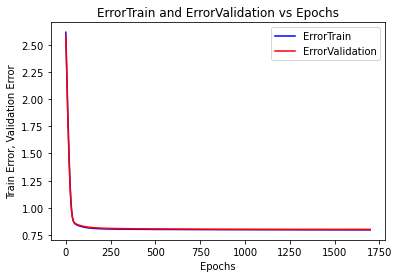

In [47]:
plt.plot(range(len(Batch_Model.ErrorTrain)), Batch_Model.ErrorTrain, c= 'blue', label = 'ErrorTrain')
plt.plot(range(len(Batch_Model.ErrorValidation)), Batch_Model.ErrorValidation, c= 'red', label = 'ErrorValidation')
plt.xlabel('Epochs')
plt.ylabel('Train Error, Validation Error')
plt.title("ErrorTrain and ErrorValidation vs Epochs")
plt.legend()
plt.show

              precision    recall  f1-score   support

         0.0       0.63      0.53      0.58        98
         1.0       0.75      0.82      0.78       168

    accuracy                           0.71       266
   macro avg       0.69      0.68      0.68       266
weighted avg       0.71      0.71      0.71       266

Accuracy :  0.7142857142857143


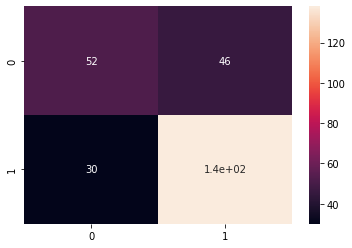

In [48]:
print(classification_report(test_Y, validation_prediction_Batch))
conf_Matrix_BGD = confusion_matrix(test_Y, validation_prediction_Batch)
sns.heatmap(conf_Matrix_BGD, annot=True)
print("Accuracy : ", (conf_Matrix_BGD[0,0] + conf_Matrix_BGD[1,1])/(np.sum(conf_Matrix_BGD)))

#Stochastic Gradient Descent

In [49]:
SGD_Model = Logistic_Regressor(No_ofFeatures, 0.1)
SGD_Model.Stochastic_GD(train_X, train_Y, test_X, test_Y)

Epoch 1:

1062/1062 :   Traning Error : 0.9552346   ||   Validation Error : 0.83275644    Validation Accuracy : 0.7218045112781954  

Epoch 2:

1062/1062 :   Traning Error : 0.93399461   ||   Validation Error : 0.83834981    Validation Accuracy : 0.7293233082706767  

Epoch 3:

1062/1062 :   Traning Error : 0.93359257   ||   Validation Error : 0.84173717    Validation Accuracy : 0.7293233082706767  

Epoch 4:

1062/1062 :   Traning Error : 0.93351459   ||   Validation Error : 0.84377617    Validation Accuracy : 0.7368421052631579  

Epoch 5:

1062/1062 :   Traning Error : 0.93345133   ||   Validation Error : 0.84509854    Validation Accuracy : 0.7368421052631579  

Epoch 6:

1062/1062 :   Traning Error : 0.93339826   ||   Validation Error : 0.84602709    Validation Accuracy : 0.7368421052631579  

Epoch 7:

1062/1062 :   Traning Error : 0.93336334   ||   Validation Error : 0.84672172    Validation Accuracy : 0.7293233082706767  



In [50]:
validation_prediction = SGD_Model.Pridction(test_X, getLabel=True)
print(f"Accuracy on Testing Data : {SGD_Model.Generic_AccuracyScore(test_Y, validation_prediction)}")

Accuracy on Testing Data : 0.7293233082706767


<function matplotlib.pyplot.show>

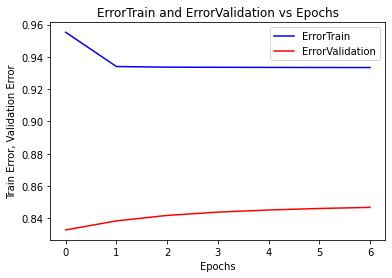

In [51]:
plt.plot(range(len(SGD_Model.ErrorTrain)), SGD_Model.ErrorTrain, c= 'blue', label = 'ErrorTrain')
plt.plot(range(len(SGD_Model.ErrorValidation)), SGD_Model.ErrorValidation, c= 'red', label = 'ErrorValidation')
plt.xlabel('Epochs')
plt.ylabel('Train Error, Validation Error')
plt.title("ErrorTrain and ErrorValidation vs Epochs")
plt.legend()
plt.show

              precision    recall  f1-score   support

         0.0       0.63      0.64      0.64        98
         1.0       0.79      0.78      0.78       168

    accuracy                           0.73       266
   macro avg       0.71      0.71      0.71       266
weighted avg       0.73      0.73      0.73       266

Accuracy :  0.7293233082706767


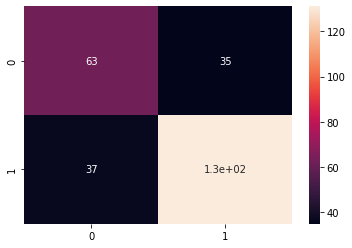

In [52]:
print(classification_report(test_Y, validation_prediction))
conf_Matrix_SGD = confusion_matrix(test_Y, validation_prediction)
sns.heatmap(conf_Matrix_SGD, annot=True)
print("Accuracy : ", (conf_Matrix_SGD[0,0] + conf_Matrix_SGD[1,1])/(np.sum(conf_Matrix_SGD)))

#Mini-Batch Gradient Descent 

In [53]:
MiniBatch_Model = Logistic_Regressor(No_ofFeatures, 0.1)
MiniBatch_Model.Stochastic_GD(train_X, train_Y, test_X, test_Y)

Epoch 1:

1062/1062 :   Traning Error : 0.96590093   ||   Validation Error : 0.83633666    Validation Accuracy : 0.7218045112781954  

Epoch 2:

1062/1062 :   Traning Error : 0.93502567   ||   Validation Error : 0.8399367    Validation Accuracy : 0.7293233082706767  

Epoch 3:

1062/1062 :   Traning Error : 0.93432253   ||   Validation Error : 0.84285856    Validation Accuracy : 0.7330827067669173  

Epoch 4:

1062/1062 :   Traning Error : 0.93411233   ||   Validation Error : 0.84470276    Validation Accuracy : 0.7368421052631579  

Epoch 5:

1062/1062 :   Traning Error : 0.93396171   ||   Validation Error : 0.84588207    Validation Accuracy : 0.7330827067669173  

Epoch 6:

1062/1062 :   Traning Error : 0.93384663   ||   Validation Error : 0.84667791    Validation Accuracy : 0.7368421052631579  

Epoch 7:

1062/1062 :   Traning Error : 0.93376725   ||   Validation Error : 0.84724425    Validation Accuracy : 0.7406015037593985  



In [54]:
validation_prediction_MBatch = MiniBatch_Model.Pridction(test_X, getLabel=True)
print(f"Accuracy on Testing Data : {MiniBatch_Model.Generic_AccuracyScore(test_Y, validation_prediction_MBatch)}")

Accuracy on Testing Data : 0.7406015037593985


<function matplotlib.pyplot.show>

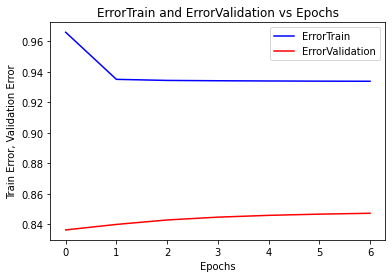

In [55]:
plt.plot(range(len(MiniBatch_Model.ErrorTrain)), MiniBatch_Model.ErrorTrain, c= 'blue', label = 'ErrorTrain')
plt.plot(range(len(MiniBatch_Model.ErrorValidation)), MiniBatch_Model.ErrorValidation, c= 'red', label = 'ErrorValidation')
plt.xlabel('Epochs')
plt.ylabel('Train Error, Validation Error')
plt.title("ErrorTrain and ErrorValidation vs Epochs")
plt.legend()
plt.show

              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65        98
         1.0       0.80      0.79      0.79       168

    accuracy                           0.74       266
   macro avg       0.72      0.72      0.72       266
weighted avg       0.74      0.74      0.74       266

Accuracy :  0.7406015037593985


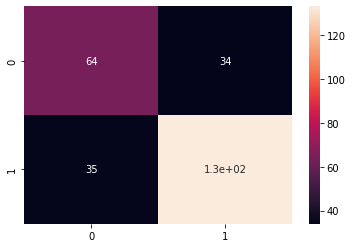

In [56]:
print(classification_report(test_Y, validation_prediction_MBatch))
conf_Matrix_MBGD = confusion_matrix(test_Y, validation_prediction_MBatch)
sns.heatmap(conf_Matrix_MBGD, annot=True)
print("Accuracy : ", (conf_Matrix_MBGD[0,0] + conf_Matrix_MBGD[1,1])/(np.sum(conf_Matrix_MBGD)))

#Review on All Three Methods

In Batch we had to do alot of epochs and at the end accuracy isn't the best when compared to other models.<br>

In Stochastic instead of finding derivate on all instance at once we calculate derivate on one instance and update our weights based on that. This approach saved us from doing so many epochs and got us the result in only 6-7 epochs.<br>

The best approach out of all is the Mini-Batch, in this we combined the approach of both batch and stochastic, which resulted in us having to do less epochs. We also improved accuracy from all other approaches.